In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-prediction/Mobile Prices Prediction Dataset.csv


# **Loading the data**

In [18]:
train_data = pd.read_csv("/kaggle/input/mobile-price-prediction/Mobile Prices Prediction Dataset.csv")
print(list(train_data.columns))
train_data.head()

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Preprocessing**

In [31]:
std = StandardScaler()
y = train_data['price_range']
X = train_data.drop(['price_range'], axis = 1)
X = std.fit_transform(X)

# **Checking Models**

Support Vector
89.0


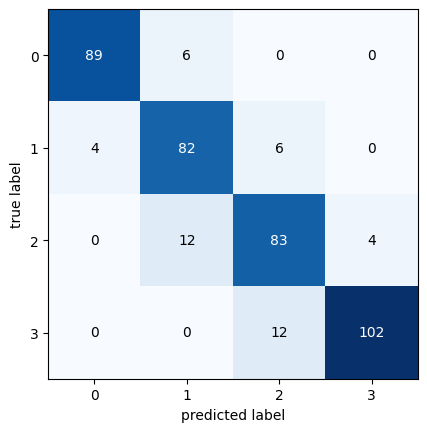



LogisticRegression
95.5


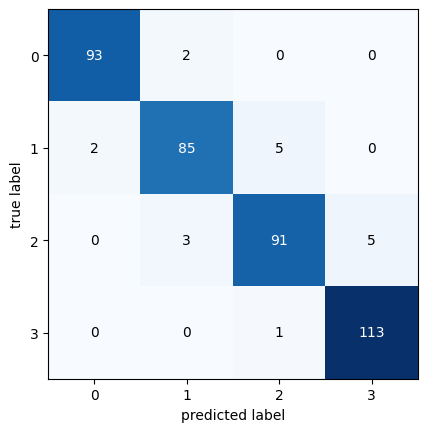



Random Forest
85.5


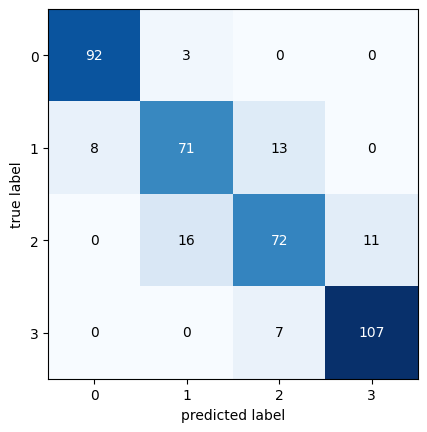



Dicision Tree
83.25


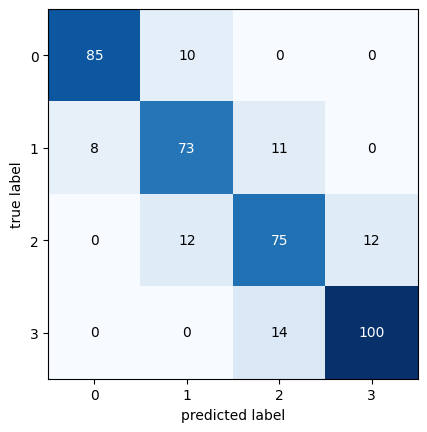



KNeighborClassifier
51.24999999999999


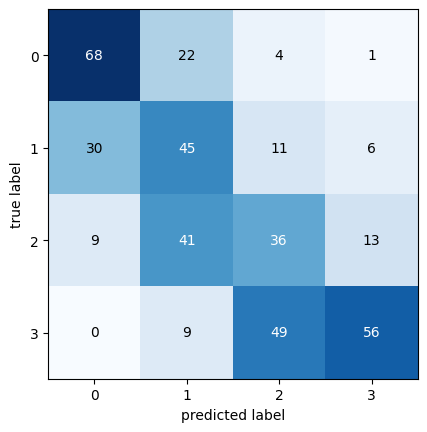



XGBoost
91.5


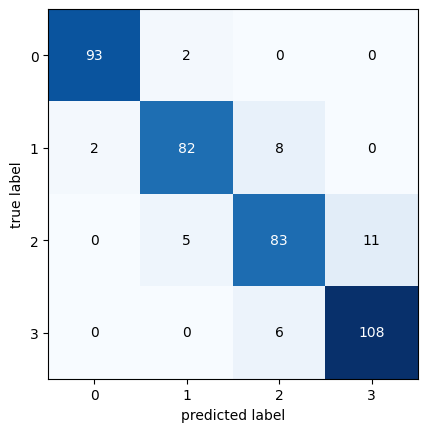



AdaBoost
72.25


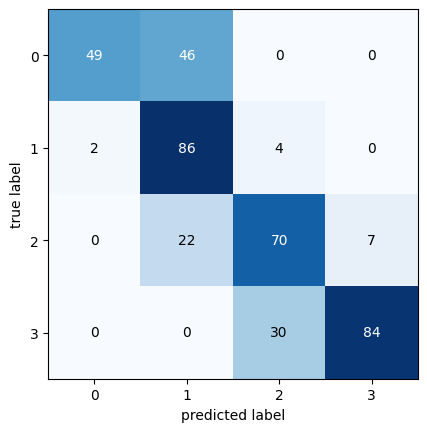



Gradient Boosting
87.5


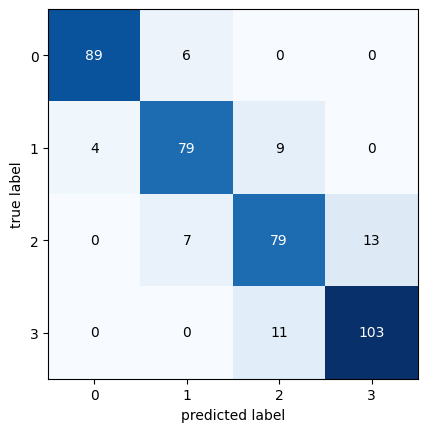

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
models = [[SVC(), "Support Vector"],
         [LogisticRegression(), "LogisticRegression"],
         [RandomForestClassifier(), "Random Forest"],
         [DecisionTreeClassifier(), "Dicision Tree"],
         [KNeighborsClassifier(), "KNeighborClassifier"],
         [xgb.XGBClassifier(objective="binary:logistic", random_state = 42), 'XGBoost'],
         [AdaBoostClassifier(n_estimators = 23), "AdaBoost"],
         [GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, max_depth = 10, random_state = 0), "Gradient Boosting"]]
for i in models:
    name = i[1]
    model = i[0]
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred) * 100)
    cnf = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat = cnf)
    plt.show()
    print("\n")

# **Optimizing Best Model**

In [34]:
hyperparameters = {
    'penalty' : ['l2'],
    'C': [0.01,0.1,1,10,100]
}
model = LogisticRegression()
grid_search = GridSearchCV(model, hyperparameters, cv= 5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

{'C': 100, 'penalty': 'l2'}
0.9712500000000001


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **Model Evalution**

0.97


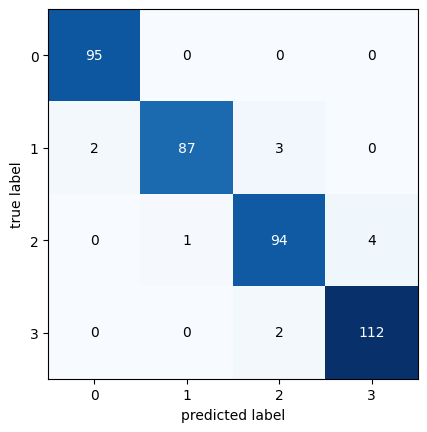

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cnf = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = cnf)
plt.show()